<a href="https://colab.research.google.com/github/sanheensethi/gndcteam/blob/master/PlantDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Downloading Dataset
!git clone https://github.com/spMohanty/PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 28.58 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Checking out files: 100% (182401/182401), done.


In [ ]:
#copy the data
!cp -R /content/PlantVillage-Dataset/raw /content/

^C


In [ ]:
#for removing any folder
!rm -r /content/Test

In [ ]:
#Inserting Libraries
import numpy as np
import random
import shutil
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
 def TestFileFolderCreate() :   
    randomFolder = random.randint(0,len(root_dir))
    folderName = root_dir[randomFolder]
    print(folderName)
    imageList = listdir(f"{directory_root}/{folderName}")
    randomImageNum = random.randint(0,len(imageList))
    ImageName = imageList[randomImageNum]
    print(ImageName)
    WriteFile(folderName,ImageName)
    src = f"{directory_root}/{folderName}/{ImageName}"
    des = '/content/Test/'
    shutil.move(src,des)

In [ ]:
#Initializing Variables
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
directory_root = '/content/raw/color'
width=256
height=256
depth=3

In [ ]:
root_dir = listdir(directory_root)
print("Number Of Folders : " + str(len(root_dir)))

Number Of Folders : 38


In [ ]:
!mkdir Test

mkdir: cannot create directory ‘Test’: File exists


In [ ]:
def WriteFile(ClassName,ImageName):
    f = open("TestFile.csv","a+")
    f.write(ClassName+","+ImageName+"\n")

In [ ]:
for i in range(0,10):
    print(i)
    TestFileFolderCreate()

0
Potato___Late_blight
73fb0463-c023-4749-8c37-dd11304de9b1___RS_LB 3112.JPG
1
Apple___healthy
55e058db-7a66-4468-b6f8-a2e3fd4d567d___RS_HL 8128.JPG
2
Peach___healthy
824013e3-8d6e-4f7c-b397-720414144511___Rutg._HL 3516.JPG
3
Soybean___healthy
7a24b872-449a-4377-8a44-97825a68cc2a___RS_HL 7338.JPG
4
Corn_(maize)___healthy
b2df7a91-eb90-4263-9305-c91d53019da7___R.S_HL 8005 copy.jpg
5
Peach___healthy
0598c367-7200-4f61-af7b-eddb6bf99e55___Rutg._HL 3737.JPG
6
Tomato___Late_blight
913a9ecb-2dad-4a37-8e5e-e97a1aa2b8a1___RS_Late.B 5327.JPG
7
Cherry_(including_sour)___healthy
83e9a1a7-8a7c-4088-acb9-b3e5f1afbe7e___JR_HL 4205.JPG
8
Squash___Powdery_mildew
c5455cd1-9c8a-4051-aca1-ed1f1f784bea___UMD_Powd.M 0226.JPG
9
Pepper,_bell___healthy
20239e3e-cf5a-40d0-a813-02989a7a92d5___JR_HL 7729.JPG


In [ ]:
#Viewing Number of Images in Folder
print("[INFO] Loading Data ")
root_dir = listdir(directory_root)
sumP = 0
for directory in root_dir :
    print("[FOLDER] Loading Folder : "+str(directory))
    plant_disease_image_list = listdir(f"{directory_root}/{directory}")
    lenP = len(plant_disease_image_list)
    print("[IMAGES] Images : " + str(lenP))
    sumP += lenP
   
print("Total Images : " + str(sumP))

In [ ]:
dataGeneration = ImageDataGenerator(validation_split=0.2,rescale=1./255,rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [ ]:
trainGenerator = dataGeneration.flow_from_directory(
        '/content/raw/color/',
        target_size=(256,256),
        batch_size=32,
        class_mode='categorical',
        shuffle=True,
        subset='training')
print(trainGenerator)
classes = trainGenerator.class_indices

Found 43432 images belonging to 38 classes.


In [ ]:
def ClassesLabel(classes):
    j=0
    for i in classes :
        f = open("Classes.csv","a+")
        f.write(str(j)+","+i+"\n")
        j = j+1

In [ ]:
ClassesLabel(classes)

In [ ]:
 validGenerator = dataGeneration.flow_from_directory(
        '/content/raw/color/',
        target_size=(256,256),
        batch_size=32,
        class_mode='categorical',
        shuffle=True,
        subset='validation')

Found 10843 images belonging to 38 classes.


In [ ]:
model = Sequential()

In [ ]:
inputShape = (256,256,3)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
n_classes = 38

In [ ]:
model.add(Conv2D(32, (3, 3), padding="same",name="conv_1", input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [ ]:
 model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
activation_8 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 85, 85, 64)       

In [ ]:
 opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


In [ ]:
 history = model.fit_generator(
    trainGenerator,steps_per_epoch = 43432//32,epochs = 2,validation_data = validGenerator,verbose=1)

Epoch 1/2
 675/1357 [=============>................] - ETA: 1:10:49 - loss: 1.4039 - accuracy: 0.6136

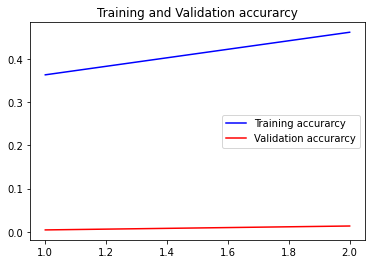

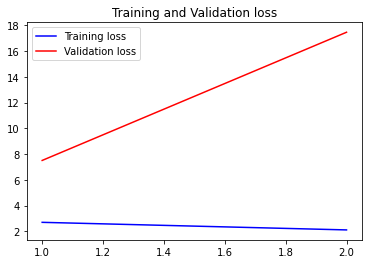

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
 
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
 print("[INFO] Calculating model accuracy")
scores = model.evaluate(validGenerator)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
339/339 [==============================] - 687s 2s/step
Test Accuracy: 1.3926034793257713


In [ ]:
 print("[INFO] Saving model...")
model.save("disease.h5")

[INFO] Saving model...


In [ ]:
from keras.models import load_model
model2 = load_model("disease.h5")

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
activation_8 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 85, 85, 64)       

In [ ]:
  opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

In [ ]:
imagePath = listdir('/content/Test')

In [ ]:
for image in imagePath:
    print("[IMAGE] : "+str(image))
    path = '/content/Test/'+image
    img = cv2.imread(path)
    img = cv2.resize(img,(256,256))
    img = img/255
    img = np.reshape(img,[1,256,256,3])
    cl = model.predict_classes([img])
    print("[CLASS] : "+str(cl[0]))

[IMAGE] : 83e9a1a7-8a7c-4088-acb9-b3e5f1afbe7e___JR_HL 4205.JPG
[CLASS] : 28
[IMAGE] : 0ce4ee15-d59b-4212-ab2a-8b6a07f3634f___JR_HL 9707.JPG
[CLASS] : 30
[IMAGE] : 73fb0463-c023-4749-8c37-dd11304de9b1___RS_LB 3112.JPG
[CLASS] : 7
[IMAGE] : 824013e3-8d6e-4f7c-b397-720414144511___Rutg._HL 3516.JPG
[CLASS] : 30
[IMAGE] : 420820fe-e1b8-49b5-8db6-65e0a80c867c___CREC_HLB 7671.JPG
[CLASS] : 37
[IMAGE] : 88877f3e-d166-4582-bbca-4b5a42687177___Com.G_TgS_FL 0728.JPG
[CLASS] : 37
[IMAGE] : 4c7e93da-6c5a-4423-89f3-db15242fd53a___Crnl_L.Mold 8703.JPG
[CLASS] : 7
[IMAGE] : c5455cd1-9c8a-4051-aca1-ed1f1f784bea___UMD_Powd.M 0226.JPG
[CLASS] : 7
[IMAGE] : 14e299a4-927e-450d-bdf8-27315ce59a5b___Mary_HL 9329.JPG
[CLASS] : 7
[IMAGE] : aed8ece7-c19f-4fa6-b831-89c36e33adb3___UF.GRC_YLCV_Lab 02396.JPG
[CLASS] : 7
[IMAGE] : RS_Rust 1834.JPG
[CLASS] : 7
[IMAGE] : 20239e3e-cf5a-40d0-a813-02989a7a92d5___JR_HL 7729.JPG
[CLASS] : 7
[IMAGE] : 0598c367-7200-4f61-af7b-eddb6bf99e55___Rutg._HL 3737.JPG
[CLASS] : 30
[IM